## For more details on estimators visit: https://www.tensorflow.org/guide/estimator   Similar to a tf.keras.Model, an estimator is a model-level abstraction. The tf.estimator provides some capabilities currently still under development for tf.keras. These are:

## Parameter server based training
## Full TFX integration.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'datasets_19_420_Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop('Id', inplace=True, axis=1)

In [6]:
df.Species.nunique()

3

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Species = le.fit_transform(df.Species)

In [13]:
df.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [11]:
df.shape

(150, 5)

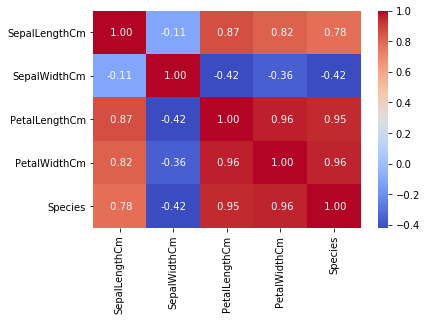

In [14]:
sns.heatmap(df.corr(),cbar=True,fmt =' .2f', annot=True, cmap='coolwarm')

In [15]:
y = df.Species

In [16]:
df.drop('Species', inplace=True, axis=1)

In [17]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
X = pd.DataFrame(sc.fit_transform(df), columns=df.columns, index= df.index)

In [20]:
X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [21]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [24]:
import tensorflow as tf

c:\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' 

In [25]:
SepalLengthCm =tf.feature_column.numeric_column("SepalLengthCm")
SepalWidthCm =tf.feature_column.numeric_column("SepalWidthCm")
PetalLengthCm =tf.feature_column.numeric_column("PetalLengthCm")
PetalWidthCm =tf.feature_column.numeric_column("PetalWidthCm")

In [26]:
feature_columns = [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]

In [27]:
cols = ["SepalLengthCm","SepalWidthCm","PetalLengthCm", "PetalWidthCm"]

In [28]:
#n_classes: Number of label classes. Defaults to 2, namely binary classification. Must be > 1.
clasfr = tf.estimator.LinearClassifier(feature_columns, n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DARAQS~1\\AppData\\Local\\Temp\\tmperf3726n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020FC84504A8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
train_input_fn = tf.estimator.inputs.pandas_input_fn(X_train, y=y_train, num_epochs=5000, shuffle=True)


In [30]:
clasfr.train(input_fn=train_input_fn)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DARAQS~1\AppData\Local\Temp\tmperf3726n\model.ckpt.
INFO:tensorflow:loss = 140.62234, step = 1
INFO:tensorflow:global_step/sec: 314.643
INFO:tensorflow:loss = 23.36

In [31]:
test_input_fn = tf.estimator.inputs.pandas_input_fn(X_test, num_epochs=1, shuffle=False)

In [33]:
result =list(clasfr.predict(input_fn=test_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\DARAQS~1\AppData\Local\Temp\tmperf3726n\model.ckpt-4102
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [34]:
y_pred = []
for each in result:
    y_pred.append(each['class_ids'][0])

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
1.0


In [36]:
cols_n = ['PetalLengthCm', 'SepalWidthCm']
X_train_n = X_train[cols_n]
X_test_n = X_test[cols_n]

In [37]:
clasfr = tf.estimator.LinearClassifier([PetalLengthCm,SepalWidthCm] , n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DARAQS~1\\AppData\\Local\\Temp\\tmp2ks_95k6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020FCA57A390>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
train_input_fn = tf.estimator.inputs.pandas_input_fn(X_train_n, y=y_train, num_epochs=5000, shuffle=True)

In [39]:
clasfr.train(input_fn=train_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DARAQS~1\AppData\Local\Temp\tmp2ks_95k6\model.ckpt.
INFO:tensorflow:loss = 140.62234, step = 1
INFO:tensorflow:global_step/sec: 346.214
INFO:tensorflow:loss = 39.077717, step = 101 (0.296 sec)
INFO:tensorflow:global_step/sec: 290.024
INFO:tensorflow:loss = 30.513103, step = 201 (0.343 sec)
INFO:tensorflow:global_step/sec: 307.869
INFO:tensorflow:loss = 30.997879, step = 301 (0.323 sec)
INFO:tensorflow:global_step/sec: 296.025
INFO:tensorflow:loss = 24.486856, step = 401 (0.340 sec)
INFO:tensorflow:global_step/sec: 259.89
INFO:tensorflow:loss = 24.300869, step = 501 (0.383 sec)
INFO:tensorflow:global_step/sec: 386.32
INFO:tensorflow:loss = 23.804102, step = 601 (0.258 sec)
INFO:tensorflow:global_step

In [40]:
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x=X_test_n, y=y_test, num_epochs=1, shuffle=False)

In [41]:
clasfr.evaluate(input_fn=eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-29T09:41:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DARAQS~1\AppData\Local\Temp\tmp2ks_95k6\model.ckpt-4102
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-29-09:41:12
INFO:tensorflow:Saving dict for global step 4102: accuracy = 0.95555556, average_loss = 0.11730727, global_step = 4102, loss = 5.278827
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4102: C:\Users\DARAQS~1\AppData\Local\Temp\tmp2ks_95k6\model.ckpt-4102


{'accuracy': 0.95555556,
 'average_loss': 0.11730727,
 'loss': 5.278827,
 'global_step': 4102}